In [16]:
from jupyterthemes import jtplot
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='oceans16')

# 신경망 학습
이번 장의 주제는 신경망 학습입니다. 여기서 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻합니다. 이번 장에서는 신경망이 학습할 수 있도록 해주는 지표인 손실 함수를 소개합니다. 이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표입니다. 이번 장에서는 손실 함수의 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용하는 경사법을 소개합니다.

## 4.1 데이터에서 학습한다!
신경망의 특징은 데이터를 보고 학습할 수 있다는 점입니다. 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이죠. 아주 멋진 소식입니다.! 만약 모든 매개변수를 수작업으로 결정해야 한다고 상상해보세요. 생각만 해도 끔찍합니다. 이를테면 2장의 퍼셉트론 예에서는 진리표를 보면서 사람이 수작업으로 매개변수 값을 설정했죠. 하지만 이때는 매개변수가 겨우 3개였습니다. 자, 그렇다면 실제 신경망에서는 매개변수가 몇 개나 될까요? 정답은 수천에서 수만입니다. 나아가 층을 깊게 한 딥러닝 정도 되면 그 수는 수억에 이를 수도 있습니다. 이쯤 되면 (아니 훨씬 전부터) 매개변수를 수작업으로 정한다는 것은 아예 불가능하죠. 이번 장에서는 신경망 학습(데이터로부터 매개변수의 값을 정하는 방법)에 대해서 설명하고 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현해봅니다.

##### Note
2장의 퍼셉트론도 직선으로 분리할수 있는(선형 분리 가능) 문제라면 데이터로부터 자동으로 학습할 수 있습니다. 선형 분리 가능 문제는 유한 번의 학습을 통해 풀 수 있다는 사실이 퍼셉트론 수렴 정리(perceptron convegence theorem)로 증명되었습니다. 하지만 비선형 분리 문제는 자동으로 학습할 수 없습니다.



### 4.1.1 데이터 주도 학습
기계학습은 데이터가 생명입니다. 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는, 그것이 바로 기계학습이죠. 데이터가 없으면 아무것도 시작되지 않습니다. 그래서 기계학습의 중심에는 데이터가 존재합니다. 이처럼 데이터가 이끄는 접근 방식 덕에 사람 중심 접근에서 벗어날 수 있습니다. 

그런데 보통 어떤 문제를 해결하려 들 때, 특히 어떤 패턴을 찾아냐애 할 때는 사람이 이것저것 생각학 ㅗ답을 찾는 것이 일반적이죠. "이 문제는 아무래도 이런 규칙성이 있는것 같아", "아니, 근본 원인은 다른 데 있을지도 몰라"와 같이 사람의 경험과 직관을 단서로 시행착오를 거듭하며 일을 진행합니다. 반면 기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도합니다. 게다가 신경망과 딥러닝은 기존 기계학습에서 사용하던 방법보다 사람의 개입을 배제할 수 있게 해주는 중요한 득성을 지녔습니다.

구체적인 문제를 하나 생각해보죠. 가령 ㅣ미지에서'5'라는 숫자를 인식하는 프로그램을 구현한다고 해봅시다. [그림 4-1]과 같은 자유분방한 손글씨를 보고 5인지 아닌지를 알아보는 프로그램을 구현하는 것이 목표입니다. 자, 비교적 단순해 보이는 문제입니다. 그런데 당장 머리속에 떠오르는 알고리즘이 있나요?

'5'를 제대로 분류하는 프로그램을 직접 고안해 설계하길나 의외로 어려운 문제임을 알 수 있습니다. 사람이라면 어렵지 않게 인식하지만, 그 안에 숨은 규칙성을 명확한 로직으로 풀기가 만만치 않습니다. 사실 [그림 4-1]을 잘 보면, 사람마다 버릇이 달라 '5'를 특징짓는 규칙을 찾기도 쉽지 않고 오래 걸릴것 같다는 느낌이 들 겁니다.

![](fig/fig_4-1.png) 손글씨 숫자 '5'의 예: 살마마다 자신만의 필체가 있다.

이쯤 되면 '5'를 인식하는 알고리즘을 밑바닥부터 '설계하는' 대신, 주어진 데이터를 잘 활용해서 해결하고 싶어질 겁니다. 그런 방ㅂ법의 하나로, 이미지에서 ``특징``을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있습니다. 여기서 말하는 특징은 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 가리킵니다. 이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOF 등의 특징을 많이 사용합니다. 이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있습니다.

이와 같은 기계학습에서는 모아진 데이터로부터 규칙을 찾아내는 역할을'기계'가 담당합니다. 무로부터 알고리즘을 설계하는 것보다 효율이 높아 문제를 해결해야 하는 사람의 부담도 덜어주죠. 다만, 이미지를 벡터로 변활할 때 사용하는 특징은 여전히 '사람'이 설계하는 것임에 주의해야 합니다. 이 말은 문제에 적합한 특징을 쓰지 않으면(혹은 특징을 설계하지 않으면) 좀처럼 좋은 결과를 얻을 수 없단느 뜻입니다. 예를 들어 개의 얼굴을 구분하려 할 때는 숫자를 인식할 때와는 다른 특징을 '사람'이 생각해야 할지도 모릅니다. 즉, 특징과 기계학습을 활용한 접근에도 문제에 따라서는 '사람'이 적절한 특징을 생각해내야 하는 것이죠.

지금까지 기계학습의 두 가지 접근법을 이야기했습니다. 이 두 방식 모두 그림으로 나타내면 [그림4-2]의 중간과 같습니다. 반면 신경망(딥러닝) 방식은 [그림 4-2]의 아래처럼 사람이 개입하지 않는 블록 하나로 그려집니다.

![](fig/fig_4-2.png) 규칙을 '사람'이 만드는 방식에서 '기계'가 데이터로부터 배우는 방식으로의 패러다임 전환: 회색 블록은 사람이 개입하지 않음을 뜻한다.

[그림 4-2]와 같이 신경망은 이미지를 '있는 그대로' 학습합니다. 두 번재 접근 방식(특징과 기계학습 방식)에서는 특징을 사람이 설계했지만, 신경망은 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습할 것입니다.

#### Note_ 
딥러닝을 종단간 기계학습 end-to-end machine learning이라고도 합니다. 여기서 종단간은 '처음부터 끝까지'라는 의미로, 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻을 담고 있죠.

신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점에 있습니다. 예를 들어 '5'를 인식하는 문제든, '개'를 인식하는 문제든, 아니면 '사람의 얼굴'을 인식하는 문제든, 세부사항과 관계없이 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도합니다. 즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습할 수 있습니다.

## 4.1.2 훈련 데이터와 시험 데이터
본격적인 신경막 학습 설명에 앞서, 기계학습에서 데이터를 취급할 때 주의할 점을 이야기하겠습니다.

기계학습 문제는 데이터를 ``훈련 데이터(Training data)``와 ``시험 데이터(test data)``로 나눠 학습과 실험을 수행하는 것이 일반적입니다. 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾습니다. 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것입니다. 그러면 왜 훈련 데이터와 시험 데이터를 나눠야 할까요? 그것은 우리가 원한느 것은 범용적으로 사용할 수 있는 모델이기 때문입니다. 이 ``범용 능력``을 제대로 평가하기 위해 훈련 데이터와 시험 데이터를 분리하는 것이죠.

범용 능력은 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력입니다. 이 범용 능력을 획득하는 것이 기계학습의 최종 목표고 말이죠. 예를 들어 손글씨 숫자 인식의 최종 결과는 엽서에서 우편 번호를 자동으로 판독하는 시스템에 쓰일지도 모릅니다. 그렇다면 손글씨 숫자 인식은 '누군가'가 쓴 글자를 인식하는 능력이 높지 않으면 안 됩니다. 그 누군가는 '특정인의 특정 글자'가 아니라 '임의의 사람의 임의의 글자'입니다. 만약 수중에 있는 훈련 데이텀나 잘 판별한다면 그 데이터에 포함된 사람의 글씨체만 학습했을 가능성이 큽니다.

그래서 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없습니다. 수중의 데이터셋은 제대로 맞히더라도 다른 데이터셋에는 엉망인 일도 벌어집니다. 참고로 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅(overfitting)이라고 합니다. 오버피팅 피하기는 기계학습의 중요한 과제이기도 합니다.

## 4.2 손실 함수
사람들에게 "직므 얼마나 행복하나요?"라고 물으면 뭐라고 대답할까요? "아주 행복하죠"나 "그리 행복한 거 같진 않아요"라는 막연한 답이 돌아오는 게 보통입니다. 그런 가운데 누군가 "현재 내 행복 지수는 10.23입니다."라고 대답한다면 질문한 사람이 당황해버리겠죠. 하나의 지표를 가지고 행복을 수치적으로 판단했다는 것이니까요. 그런 사람이 정말 있다면 그 사람은 자신의 '행복 지표'를 기준으로 인생을 살아가게 될 지도 모릅니다.

자, 이'행복 지표'이야기는 하나의 비유지만, 실은 신경망 학습에서도 이와 같ㅇ느 일을 수행합니다. 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현합니다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것입니다. '행복 지표'를 가진 사람이 그 지표를 근거로 '최적의 인생'을 탐색하듯, 신경망도 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색합니다. 신경망 학습에서 사용하는 지표는 손실 함수(loss function)라고 합니다. 이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로 평균 제곱 오차와 교차 엔트로피 오차를 사용합니다.
#### WARNING_
손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 저치라히 '못'하느냐를 나타냅니다. '성능 나쁨'을 지표로 한다니 무언가 부자연스럽다고 생각할지 모르지만, 손실 함수에 마이너스만 곱하면 '얼마나 나쁘지 않냐', 즉 '얼마냐 좋아냐'라는 지표로 변ㅅ니하죠. 또 '나쁨을 최소로 하는 것'과 '좋음을 최대로 하는 것'은 결국 같은 것이니까, 성능의 '나쁨'과 '좋음'중 어느 쪽을 지표로 삼아도 본질적으로 수행하는 일은 다르지 않습니다.

## 4.2.1 평균 제곱 오차
가장 많이 쓰이는 손실 함수는 ``평균 제곱 오차(mean squared error, MSE)``입니다. 평균 제곱 오차는 수식으로는 다음과 같습니다.

$$E=\dfrac {1}{2}\sum _{k}\left( y_{k}-t_{k}\right) ^{2}   \quad[식4.1]  $$
여기서 $y_k$는 신경망의 출력(신경망이 추정하는 값), $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타냅니다. 이를테면 "3.6 손글씨 숫자 인식" 예에서 $y_k$와 $t_k$는 다음과 같은 원소 10개짜리 데이터 입니다.



In [50]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


    
이 배열들의 원소는 첫 번째 인덱스 순서부터 숫자 '0', '1', '2', ... 일 때의 값입니다. 여기에서 신경망의 출력 y는 소프트맥스 함수의 출력입니다. 소프트맥스 함수의 출력은 확률로 해석 할 수 있으므로, 이 예에서는 이미지가 '0'일 확률은 0.1, '1'일 확률을 0.05, '2'일 확률은 0.6이라고 해석되죠. 한편 정답 레이블인 t는 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기합니다. 여기에서는 숫자 '2'에 해당하는 원소의 값이 1이므로 정답이 '2'임을 알 수 있습니다. 이처럼 한 원소만 1로하고 그 외는 0으로 나타내는 표긱법을 `원-핫 인코딩` 이라 한다고 했습니다.

자, 평균 제곱 오차는 [식 4-1]과 같이 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차($y_k-t_k)$를 제곱한 후, 그 총합을 구합니다. 그러면 이 평균 제곱 오차를 파이썬으로 구현해 봅시다.

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

여기에서 인수 y와 t는 넘파이 배열입니다. 이 코드는 [식 4.1]을 그대로 구현한 것이니 설명은 생략합니다. 그러면 이 함수를 실제로 사용해보죠

In [3]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

0.09750000000000003

In [4]:
# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
# 예2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

두 가지 예를 살펴봤습니다. 첫 번째 예의 정답은 '2'고 신경망의 출력도 '2'에서 가장 높은 경우입니다. 한편, 두 번째 예에서는 정답은 똑같이 '2'지만, 신경망의 출력은 '7'에서 가장 높습니다. 이 실험의 결과로 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있습니다. 즉, 평균 제곱 오차를 기준으로는 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있습니다.

## 4.2.2 교차 엔트로피 오차
또 다른 손실 함수로서 `교차 엔트로피 오차(cross entropy error, CEE)`도 자주 이용합니다. 교차 엔트로피 오차의 수식은 다음과 같습니다.
$$E=-\sum _{k}t_{k}\log y_{k} \quad[식4.2] $$ 
여기에서 log는 밑이 e인 자연로그($log_e$)입니다. $y_k$는 신경망의 출력, $t_k$는 정답 레이블입니다. 또 $t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0입니다.(원-핫 인코등). 그래서[식 4.2]는 실질적으로 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식이 됩니다.(정답이 아닌 나머지는 모두 $t_k$가 0이므로 $logy_x$와 곱해도 0이 되어 결과에 영향을 주지 않습니다.) 예를 들어 정답 레이블은 '2'가 정답이라 하고 이때의 신경망 출력이 0.6이라면 교차 엔트로피 오차는 -log0.6 = 0.51이 됩니다. 또한, 같은 조건에서 신경망 출력이 0.1이라면 -log0.1 = 2.30이 됩니다. 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됩니다.

한편, [그림 4-3]은 자연로그의 그래프 입니다.
![](fig/fig_4-3.png) 자연로그 $y=logx$의 그래프

이 그림에서 보듯이 x가 1일때 y는 0이 되고 x가 0에 가까워질수록 y의 값은 점점 작아집니다. [식 4.2]도 마찬가지로 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 됩니다. 반대로 정답일 때의 출력이 작아질수록 오차는 커집니다.

그럼 교차 엔트로피 오차를 구현해 봅시다.



In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

여기에서는 y와 t는 넘파이 배열입니다. 그런데 코드 마지막을 보면 np.log를 계산할 때 아주 작은 값인 delta를 더했습니다. 이는 np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게 되기 때문입니다. 아주 작은 값을 더해서 절대 0이 되지 않도록, 즉 마이너스 무한대가 발생하지 않도록 한 것이죠. 그러면 이 cross_entropy_error(y, t) 함수를 써서 간단한 계산을 해봅시다. 정답은 똑같이 '2'입니다.

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

첫 번재 예는 정답일 때의 출력이 0.6인 경우로, 이때의 교차 엔트로피 오차는 약 0.51입니다. 그 다음은 정답일 때의 출력이 (더 낮은) 0.1인 경우로, 이때의 교차 엔트로피는 무려 2.3입니다. 즉, 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 평균 제곱 오차의 판단과 일치합니다.

## 4.2.3 미니배치 학습
기계학습 문제는 훈련 데이터를 사용해 학습합니다. 더 구체적으로 말하면 훈련 데이터에 대한 손실 함수의 값을 구하고 ,그 값을 최대한 줄여주는 매개변수를 찾아냅니다. 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 합니다. 즉, 훈련 데이터가 100개 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는 것입니다.

지금까지 데이터 하나에 대한 손실 함수만 생각해왔으니, 이제 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각해보겠습니다. 예를 들어 교차 엔트로피 오차는 [식 4.3]처럼 됩니다.

$$E=-\dfrac {1}{N}\sum _{n}\sum _{k}t_{nk}\log y_{nk} \quad[식4.3] $$ 
이때 데이터가 N개라면 $t_{nk}$는 n번째 데이터의 k번째 값을 의미합니다($y_nk$는 신경망의 출력, $t_nk$는 정답 레이블입니다). 수식이 좀 복잡해 보이지만 데이터 하나에 대한 손실 함수인 [식 4.2]를 단순히 N개의 데이터로 확장했을 뿐입니다. 다만, 마지막에 N으로 나누어 정규화하고 있습니다.  N으로 나눔으로써 '평균 손실 함수'를 구하는 것입니다. 이렇게 평균을 구해 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있습니다. 예를 들어 훈련 데이터가 1,000개든, 10,000개든 상관없이 평균 손실 함수를 구할 수 있습니다.

그런데 MNIST 데이터셋은 훈련 데이터가 60,000개였습니다. 그래서 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 좀 걸립니다. 더 나아가 빅데이터 수준이 되면 그 수는 수백만에서 수천만도 넘는 거대한 값이 되기도 합니다. 이 많은 데이터를 대상으로 일일이 손실 함수를 계산한는 것은 현실적이지 않겠죠. 이런 경우 데이터 일부를 추려 전체의 '근사치'로 이용할 수 있습니다. 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행합니다. 이 일부를 `미니배치(mini-bartch)`라고 하죠. 가령 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만을 사용하여 학습하는 것입니다. 이러한 학습 방법을 미니배치 학습이라고 합니다.

그렇다면 미니배치 학습을 구현하는, 즉 훈련 데이터에서 지정한 수의 데이터를 무작위로 골라내는 코드를 작성해봅시다. MNIST 데이터셋을 읽어오는 코드는 다음과 같습니다.

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, y_test) = load_mnist(
    normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


3장에서도 설명했지만 load_mnist 함수는 MNIST 데이터셋을 읽어오는 함수입니다. 이 함수는 dataset/mnist.py 파일에 있습니다. 이 함수는 훈련 데이터와 테스트 데이터를 읽습니다. 호출할 때 one_hot_label=True로 지정하여 원-핫 인코딩으로, 즉 정답 위치의 원소만 1이고 나머지가 0인 배열을 얻을 수 있습니다.

앞의 코드에서 MNIST 데이터를 읽은 결과, 훈련 데이터는 60,000개이고, 입력 데이터는 784열(원래는 28x28)인 이미지 데이터임을 알 수 있습니다. 또, 정답 레이블은 10줄짜리 데이터입니다. 그래서 앞의 x_train, t_train의  모습은 각각 (60000, 784)와 (60000, 10)이 됩니다.

그러면 이 훈련 데이터에서 무작위로 10장만 빼내려면 어떻게 하면 될까요? 넘파이의 np.random.choice() 함수를 쓰면 다음과 같이 간단히 해결할 수 있습니다.

In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice()로는 지정한 수 중에서 무작위로 원하는 개수만 꺼낼 수 있습니다. 가령 np.random.choice(60000, 10)은 0이상 60000 미만의 수 중에서 무작위로 10개를 골라냅니다. 다음은 실제로 돌려본 모습입니다. 이 함수가 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용하면 되겠죠.

In [12]:
np.random.choice(60000, 10)

array([20095, 34947, 56965, 13217, 37243, 52512, 46833, 22288,  2501,
       23561])

이제 무작위로 선택한 이 인덱스를 사용해 미니배치를 뽑아내기만 하면 됩니다. 손실 함수도 이 미니배치로 계산합니다.

### NOTE_
텔레비전 시청률도 모든 세대의 텔레비전이 아니라 선택된 일부 가구의 텔레비전만을 대상으로 구합니다. 예를 들어 경기 지방에서 무작위로 선정한 1,000가구를 대상으로 시청률을 계측한 다음, 경기 지방 전체의 시청률로 근사하는 것이죠. 그 1,000가구의 시청률이 전체 시청률과 정확히 일치하지는 않겠지만, 전체의 대략적인 값으로 사용할 수 있습니다. 이 시청률 이야기와 마찬가지로 미니배치의 손실 함수도 일부 표본 데이터로 전체를 비슷하게 계측합니다. 즉, 전체 훈련 데이터의 대표로서 무작위로 선택한 작은 덩어리(미니배치)를 사용하는 것입니다.

## 4.2.4(배치용) 교차 엔트로피 오차 구현하기
그럼, 미니배치 같은 배치 데이터를 지원하는 교차 엔트로피 오차는 어떻게 구현할까요? 다행히 조금 전에 구현한 교차 엔트로피 오차(데이터를 하나씩 처리하는 구현)를 조금만 바꿔주면 됩니다. 여기에서는 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현하겠습니다.

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(ty)) / batch_size

위 코드에서 y는 신경망의 출력, t는 정답 레이블 입니다. y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔줍니다. 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산합니다.

정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7'등의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구현할 수 있습니다.

In [14]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

이 구현에서는 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심입니다. 다시 말하면 정답에 해당하는 신경망의 출력만으로 교차 엔트로피를 계산할 수 있습니다. 그래서 원-핫 인코딩시 t * np.log(y)였던 부분을 레이블 표현일 대는 np.log(y[np.arange(batch_szie),t])로 구현합니다.

참고로 np.log(y[np.arange(batch_size), t])를 간단히 설명하겠습니다. np.arange(batch_szie)는 0부터 batch_size - 1 까지 배열을 생성합니다. 즉, batch_size 가 5이면 np.arange(batch_size)는 [0,1,2,3,4]라는 넘파이 배열을 생성합니다. t에는 레이블이 [2, 7, 0, 9, 4]와 같이 저장되어 있으므로 y[np.range(batch_size), t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출합니다(이 예에서는 y[np.arange(batch_size),t]는 [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]]인 넘파이 배열을 생성합니다.).

## 4.2.5 왜 손실 함수를 설정하는가?
이쯤이면 손실 함수의 정의는 이해하셨을 겁니다. 그런데 왜 굳이 손실 함수를 사용해야 하는 걸까요? 예컨대 숫자 인식의 경우도 우리의 궁극적인 목적은 높은 '정확도'를 끌어내는 매개변수 값을 찾는 것입니다. 그렇다면 '정확도'라는 지표를 놔두고 '손실 함수의 값'이라는 우회적인 방법을 택하는 이유는 뭘까요?

이 의문은 신경망 학습에서의 '미분'의 역할에 주목한다면 해결됩니다. 자세한 것은 다음 절에서 설명합니다만, 신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾습니다. 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의값을 서서히 갱신한느 과정을 반복합니다.

가령 여기에 가상의 신경망이 있고 그 신경망의 어느 한 가중치 매개변수에 주목한다고 합시다. 이때 그 가중치 매개변수의 손실 함수의 미분이란 '가중치 매개변수의 값을 아주 조금 변화 시켰을 때, 손실 함수가 어떻게 변하나'라는 의미입니다. 만약 이 미분 값이 음수면 그 가중치 매개변수를 양의 방향을 ㅗ변화시켜 손실 함수의 값을 줄일 수 있스빈다. 반대로, 이 미분 값이 음수면 그 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있습니다. 그러나 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 달라지지 않습니다. 그래서 가중치 매개변수의 갱신은 거기서 멈춥니다.

정확도를 지표로 삼아서는 안되는 이유는 미분 값이 대부분의 장소에서 0이되어 매개변수를 갱신할 수 없기 때문이빈다. 자, 이야기가 좀 길어졌으니 지금까지의 설명을 정리하겠습니다.

`신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이되기 때문이다.`

정확도를 지표로 삼으면 매개변수의 미분이 대부분의 장소에서 0이되는 이유는 무엇일까요?

구체적인 예를 보겠습니다. 한 신경망이 100장의 훈련 데이터 중 32장을 올바로 인식한다고 합니다. 그렇다면 정확도는 32%입니다. 만약 정확도가 지표였다면 가중치 매개변수의 값을 조금 바꾼다고 해도 정확도는 그대로 32%일 것입니다. 즉, 매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지됩니다. 혹, 정확도가 개선된다 하더라도 그 값은 32.0123%와 같은 연속적ㅇ니 변화보다는 33%나 34%처럼 불연속적인 띄엄띄엄한 값으로 바뀌어 버립니다.

한편, 손실 함수를 지표로 삼았다면 어떨까요? 현재의 손실 함수의 값은 0.92543... 같은 수치로 나타납니다. 그리고 매개변수의 값이 조금 변하면 그에 반응하여 손실 함수의 값도 0.93432... 처럼 연속적으로 변화하는 것입니다.

정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화합니다. 이는 '계단 함수'를 활성화 함수로 사용하지 않는 이유와도 들어맞습니다. 만약 활성화 함수로 계단 함수를 사용하면 지금까지 설명한 것과 같은 이유로 ㅅ니경망 학습이 잘 이뤄지지 않습니다. 계단 함수의 미분은 [그림4-4]와 같이 대부분의 장소(0 이외의 곳)에서 0입니다. 그 결과, 계단 함수를 이용하면 손실 함수를 지표로 삼는 게 아무 의미가 없게 됩니다. 매개변수의 작은 변화가 주는 파장을 계단 함수가 말살하여 손실 함수의 값에는 아무런 변화가 나타나지 않기 때문입니다.

![그림 4-4](fig/fig_4-4.png) 계단 함수와 시그모이드 함수 : 계단 함수는 대부분의 장소에서 기울기가 0이지만, 시그모이드 함수의 기울기(접선)는 0이 아니다.

계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수의 미분(접선)은 [그림4-4]와 같이 출력(세로축의 값)이 연속적으로 변하고 곡선의 기울기도 연속적으로 변합니다. 즉, 시그모이드 함수의 미분은 어느 장소라도 0이 되지는 않습니다. 이는 신경망 학습에서 중요한 성질로, 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있는 것이빈다.


# 4.3 수치 미분
경사법에선느 기울기(경사) 값을 기준으로 나아갈 방향을 정합니다. 기울기란 무엇인지, 또 어떤 성질이 있는지를 설명하깅 ㅔ앞서, 이번 절에서는 학생 대 배운 '미분'부터 복습해보겠습니다.

## 4.3.1 미분
여러분이 마라톤 선수고 처음부터 10분에 2km씩 달렸다고 해봅시다. 이때의 속도는 간단히 2 / 10 = 0.2 [km/분]이라고 계산할 수 있습니다. 즉, 1분에 0.2km만큼의 속도(변화)로 뛰었다고 해석할수 있습니다.

이 마라톤 예에서는 '달린 거리'가 '시간'에 대해서 얼마나 변화했는가를 계산했습니다. 다만 여기에서 10분에 2km를 뛰었다는 것은, 정확하게는 10분 동안의 '평균 속도'를 구한 것이죠. 미분은 '특정 순간'의 변화량을 뜻합니다. 그래서 10분이라는 시간을 가능한 줄여(직전 1분에 달린 거리, 직전 1초에 달린 거리, 직전 0.1초에 달린 거리, ... 식으로 갈수록 간격을 줄여) 한 순간의 변화량(어느 순간의 속도()을 얻는 것이죠.

이처럼 미분은 한순간의 변화량을 표시한 것입니다. 수식으로 다음과 같습니다.
$$ \frac{d f(x)}{d x}=\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}\quad 식[4.4]$$
[식 4.4]는 함수의 미분을 나타낸 식입니다. 좌변은 f(x)의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타낸느 기호입니다. 결국, x의 '작은 변화'가 함수 f(x)를 얼마나 변화시키느냐를 의미합니다. 이때 시간의 작은 변화, 즉 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 의미를 $ \lim _{h \rightarrow 0} $로 나타납니다.

자, [식 4.4]를 참고하여 함수를 미분하는 계산을 파이썬으로 구현해봅시다. [식 4.4]를 곧이 곧대로 구현하려면 h에 작은 값을 대입해 다음과 같이 계산할 수 있습니다.

In [8]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

함수의 이름은 `수치 미분(numerical differentiation`에서 따온 numerical_diff(f, x)로 했습니다. 이 함수는 '함수 f'와 '함수 f에 넘길 인수  x'라는 두 인수를 받습니다. 얼핏 보면 문제가 없어 보이지만, 실제로는 개선해야 할 점이 2개 있습니다.

앞의 구현에서는 h에 가급적 작은 값을 대입하고 싶었이게(가능하다면 h를 0으로 무한히 가깝게 하고 싶으니) 10e-50이라는 자근 값을 사용했습니다. 이 값은 0.00...1 에서 0이 50개라는 의미죠. 그러나 이 방식은 `반올림 오차(rounding error`문제를 일으킵니다. 반올림 오차는 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생기게 합니다. 파이썬에서의 반올림 오차로는 다음과 같은 예가 있습니다.

In [9]:
np.float32(1e-50)

0.0

이와 같이 1e-50을 float32형(32비트 부동소수점)으로 나타내면 0.0이 되어, 올ㄹ바로 표현할 수 없습니다. 너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제가 된다는 것이죠. 여기가 첫 번재 개선 포인트입니다. 이 미세한 값 h로 $10^-4$ 정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있습니다.

두 번째 개선은 함수 f의 차분(임의 두 점에서의 함수 값들의 차이를 말합니다.)과 관련ㄷ한 것입니다. 앞의 구현에서는 x+h와 x 사이의 함수 f의 차분을 계산하고 있지만, 애당초 이 계산에는 오차가 있다는 사실에 주의해야 합니다. [그림 4-5]와 같이 '진정한 미분'은 x 위치의 함수의 기울기(이를 접선이라 함)에 해당하지만, 이번 구현에서의 미분은 (x+h)와 x 사이의 기울기에 해당합니다. 그래서 진정한 미분(진정한 접선)과 이번 구현의 값은 엄밀히는 일치하지 않습니다. 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계입니다.
![그림 4-4](fig/fig_4-5.png) 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다
[그림 4-5]와 같이 수치 미분에는 오차가 포함됩니다. 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 합니다. 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 `중심 차분` 혹은 `중앙 차분`이라 합니다.(한편, (x+h)와 x의 차분은 `전방 차분`이라 합니다)

그럼 이상의 두 개선점을 적용해 수치 미분을 다시 구현해봅시다.

In [10]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

##### note_
여기에서 하는 것처럼 아주 작은 차분으로 미분하는 것을 `수치 미분`이라 합니다. 한편 ,수식을 전개해 미분하는 것을 `해석적(analytic`이라는 말을 이용하여 '해석적 해' 혹은 '해석적으로 미분하다'등으로 표현합니다. 가령 $y=x^2$의 미분은 해석적으로는 $\dfrac {dy}{dx}=2x$로 풀어낼 수 있습니다. 그래서 x=2일 때 y의 미분은 4가 됩니다. 해석적 미분은 오차를 포함하지 않는 '진정한 미분'값을 구해줍니다. '해석적 미분은 우리가 수학시간에 배운 바로 그 미분이고, '수치 미분'은 이를 '근사치'로 계산하는 방법입니다. 수치해석학은 '해석학 문제에서 수치적인 근삿값을 구하는 알고리즘을 연구하는 학문' 입니다.

## 4.3.2 수치 미분의 예
앞 절의 수치 미분을 사용하여 간단한 함수를 미분해봅시다. 우선 다음과 같은 2차 함수입니다.
$$ y=0.01 x^{2}+0.1 x  \quad 식4.5$$
[식 4.5]를 파이썬으로 구현하면 다음과 같이 됩니다.

In [12]:
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

이어서 이함수를 그려봅시다.

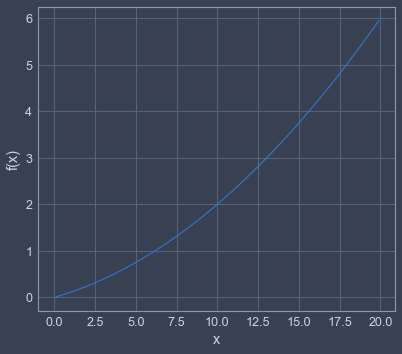

In [17]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)  # 0부터 20까지 0.1 간격의 배열 x를 만든다
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

그럼 x = 5 일 때와 10일 때 이 함수의 미분을 곗나해봅시다.

In [18]:
numerical_diff(function_1, 5)

0.1999999999990898

In [19]:
numerical_diff(function_1, 10)

0.2999999999986347

이렇게 계산한 미분 값이 x에 대한 f(x)의 변화량 입니다. 즉, 함수의 기울기에 해당합니다. 또한 $f(x) = 0.0.x^2 + 0.1x$의 해석적 해는  $\dfrac {df(x)}{dx}=0.02x + 0.1$입니다. 그래서 x가 5와 10일 때의 '진정한 미분'은 차례롤 0.2와 0.3입니다. 앞의 수치 미분과 결과를 비교하면 그 오차가 매우 작음을 알 수 있습니다. 실제로 거의 같은 값이라고 해도 될 만큼 작은 오차입니다.

이제 앞에서 구한 수치 미분 값을 기울기로 하는 직선을 그려보겠습니다. 결과는 [그림 4-7]과 같이 되어, 함수의 접선에 해당하는 것을 확인 할 수 있습니다.

![그림 4-4](fig/fig_4-7.png) x=5, x=10에서의 접선 : 직선의 기울기는 수치 미분에서 구한 값을 사용하였다.

## 4.3.3 편미분
이어서 [식 4.6]의 함수를 살펴보죠. 인수들의 제곱 합을 계산하는 단순한 식입니다만, 앞의 예와 달리 변수가 2개라는 점에 주의해야 합니다.
$$ f\left(x_{0}, x_{1}\right)=x_{0}^{2}+x_{1}^{2} \quad [식 4.6]$$
이 식은 파이썬으로 다음과 같이 구현할 수 있습니다.

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2

인수 x는 넘파이 배열이라고가정합니다. 이 코드는 넘파이 배열의 각 원소를 제곱하고 그 합을 더할 뿐인 간단한 구현입니다(또는 np.sum(x**2) 형태로 구현할 수 있습니다.). 자, 이 함수를 그래프로 그려볼까요? 결과는 [그림 4-8] 처럼 3차원으로 그려집니다.

![그림 4-8](fig/fig_4-8.png)

그럼 [식 4.6]을 미분해 보죠. 여기서 주의할 점은 [식 4.6]에는 변수가 2개라는 것입니다. 그래서 '어느 변수에 대한 미분이냐' 즉 $x_0$와 $x_1$ 중 어느 변수에 대한 미분이냐를 구별해야 합니다. 덧붙여 이와 같이 변수가 여렷인 함수에 대한 미분을 `편미분`이라고 합니다. 이 편미분을 수식으로는 $\dfrac {\partial f}{\partial x_0}$ 나 $\dfrac {\partial f}{\partial x_1}$ 처럼 씁니다. 편미분은 어떻게 구할까요? 연습삼아 다음 두 편미분 문제를 풀어보시죠.

문제 1: $x_0=3$, $x_1=4$ 일 때, $x_0$에 대한 편미분 $\dfrac {\partial f}{\partial x_0}$ 를 구하라.

In [21]:
def function_tmp1(x0):
    return x0 * x0 + 4.0**2.0


numerical_diff(function_tmp1, 3.0)

6.00000000000378

문제 2: $x_0=3$, $x_1=4$ 일 때, $x_0$에 대한 편미분 $\dfrac {\partial f}{\partial x_1}$ 를 구하라.

In [22]:
def function_tmp2(x1):
    return x1 * x1 + 3.0**2.0


numerical_diff(function_tmp2, 4.0)

7.999999999999119

이들 문제는 변수가 하나인 함수를 정의하고, 그 함수를 미분하는 형태로 구현하여 풀었습니다. 예를 들어 문제 1에서는 $x_1=4$로 고정된 새로운 함수를 정의하고, 변수가 $x_0$ 하나뿐인 함수에 대한 수치 미분 함수를 적용하였습니다. 이렇게 구한 문제 1의 결과는 6.00000000000378, 문제 2의 결과는 7.999999999999119 입니다. 보다시피 해석적 미분의 결과와 거의 같지요.

이처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구합니다. 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정합니다. 앞의 예에서는 목표 변수를 제외한 나머지를 특정 값에 고정하기 위해서 새로운 함수를 정의했지요. 그리고 그 새로 정의한 함수에 대해 그동안 사용한 수치 미분 함수를 적용하여 편미분을 구한 것입니다.

## 4.4 기울기
앞 절의 예에서는 $x_0$와 $x_1$의 편미분을 변수별로 따로 계산했습니다. 그럼 $x_0$와 $x_1$의 편미분을 동시에 계산하고 싶다면 어떻게 할까요? 가령, $x_0 = 3, x_1 = 4$일 때 $(x_0, x_1)$ 양쪽의 편미분을 묶어서 $(\dfrac {\partial f}{\partial x_0}, \dfrac {\partial f}{\partial x_1})$처럼 모든 변수의 편미분을 벡터로 정리한 것을 `기울기(gradient)`라고 합니다. 기울기는 예를 들어 다음과 같이 구현할 수 있습니다.

In [25]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val

    return grad

numerical_gradient(f, x) 함수의 구현은 좀 복잡하게 보이지만 동작 방식은 변수가 하나일 때의 수치 미분과 거의 같습니다. 참고로, np.zeros_like(x)는 x와 형상이 같고 그 원소가 모두 0인 배열을 만듭니다.

numerical_gradient(f, x) 함수의 인수인 f는 함수이고 x는 넘파이 배열이므로 넘파이 배열 x의 각 원소에 대해서 수치 미분을 구합니다. 그러면 이 함수를 사용해서 실제로 기울기를 계산해봅시다. 여기에서는 세 점 (3, 4), (0, 2), (3, 0)에서의 기울기를 구해보겠습니다.

In [26]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [27]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [28]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

이처럼 $(x_0, x_1)$의 각 점에서의 기울기를 계산할 수 있습니다. 앞의 예에서는 점 (3, 4)의 기울기는 (6, 8), 점 (0, 2)의 기울기는 (0, 4), 점 (3, 0)의 기울기는 (6, 0)이라는 결과를 얻었습니다. 그런데 이 기울기라는 게 의미한느 건 뭘까요? 그림으로 그려보면 이핵 ㅏ될 겁니다. 다만, 여기에서는 기울기의 결과에 마이너스를 붙인 벡터를 그려보겠습니다.

기울기 그림은 [그림 4-9]처럼 방향을 가진 벡터(화살표)로 그려집니다. 이 그림을 보면 기울기는 함수의 '가장 낮은 장소(최솟값)'를 가리키는 것 같습니다. 마치 나침반처럼 화살표들은 한 점을 향하고 있죠. 또 '가장 낮은 곳에서' 멀어질수록 화살표의 크기가 커짐을 알 수 있습니다.
![그림 4-9](fig/fig_4-9.png) $f(x_0, x_1) = x_0^2+x_1^2$의 기울기

[그림 4-9]에서 기울기는 가장 낮은 장소를 가리킵니다만, 실제는 반드시 그렇다고는 할 수 없습니다. 사실 기울기는 각 지점에서 낮아지는 방향을 가리킵니다. 더 정확히 말하자면 `기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향` 입니다. 이건 중요한 포인트니 확실히 기억하세요.

## 4.4.1 경사법(경사 하강법)
기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아냅니다. 신경망 역시 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 합니다. 여기에서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값입니다. 그러나 일반적인 문제의 손실 함수는 매우 복잡하죠. 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 알아내기가 만만치 않습니다. 이런 상황에서 기울기르 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것이 경사법입니다.

여기에서 주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시한느 지표가 기울기라는 것입니다. 그런 ㅏ기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없습니다. 질제로 복잡한 함수에선느 기울기가 가리키는 방향에 최소값이 없는 경우가 대부분입니다.

##### WARNING_
함수가 극솟값, 최솟값, 또 `안장점(saddle pooint)`이 되는 장소에서는 기울기가 0입니다. 극솟값은 국소적인 최솟값, 즉 한정된 범위에서의 최솟값인 점입니다. 안장점은 어느 방향에서 보면 극댓값이고 다른 방향에서 보면 극솟값이 되는 점입니다.(말 안장의 모양을 떠올려 보세요) 경사법은 기울기가 0인 장소를 찾지만 그것이 반드시 최솟값이라고는 할 수 없습니다.(극솟값이나 안장점일 가능성이 있습니다). 또, 복잡하고 찌그러진 모양의 함수라면(대부분) 평평한 곳으로 파고들면서 `고원(plateau)`이라 하는 학습이 진행되지 않는 정체기에 빠질 수 있습니다.

기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향을 ㅗ가야 함수의 값을 줄일 수 있습니다. 그래서 최솟값이 되는 장소를 찾는 문제(아님녀 가능한 한 작은 값이 되는 장소를 찾는 문제)에서는 기울기 정보를 단서로 나아갈 방향을 정해야 합니다.

드디어 경사법이 등장할 차례입니다. 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동합니다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복합니다. 이렇게 해서 함수의 값을 점차 줄이는 것이 `경사법(gradient method)`입니다. 경사법은 기계학습을 최적화하는 데 흔히 쓰이는 방법입니다. 특히 신경망 학습에는 경사법을 많이 사용합니다.

##### NOTE_
경사법은 최솟값을 찾느냐, 최댓값을 찾느냐에 따라 이름이 다름니다. 전자를 `경사 하강법(gradient descent method)`, 후자를 `경사 상승법(gradient ascent method)`라고 하죠. 다만 손실 함수의 부호를 반전시키면 최솟값을 찾는 문제와 최댓값을 찾는 문제는 같은 것이니 하강이냐 상승이냐는 본질적으로는 중요하지 않습니다. 일반적으로 신경망(딥러닝) 분야에서의 경사법은 '경사 하강법'으로 등장할 때가 많습니다.

그럼 경사법을 수식으로 나타내보겠습니다.
$$ 
\begin{array}{l}{x_{0}=x_{0}-\eta \frac{\partial f}{\partial x_{0}}} \\ {x_{1}=x_{1}-\eta \frac{\partial f}{\partial x_{1}}}\end{array} \quad [식 4.7]
 $$
 
 식 [4.7]의 $\eta$ $기호^{eta, 에타}$ 는 갱신하는 양을 나타냅니다. 이를 신경망 학습에서는 학습률(learning rate)이라고 합니다. 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률입니다.
 
 식 [4.7]은 1회에 해당하는 갱신이고, 이 단계를 반복합니다. 즉, [식 4.7]처럼 변수의 값을 갱신한느 단계를 여러 번 반복하면서 서서히 함수의 값을 줄이는 것입니다. 또, 여기에서는 변수가 2개인 경우를 보여줬지만, 변수의 수가 늘어도 같은 식(각 변수의 편미분 값)으로 갱신하게 됩니다.
 
 또한 학습률 값은 0.01이나 0.001등 미리 특정 값으로 정해두어야 하는데요, 일반적으로 이 값이 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없습니다. 신경망 학습에서는 보통 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행합니다.
 
 경사 하강법은 다음과 같이 간단하게 구현할 수 있습니다.
 

In [29]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

인수 f는 최적화하려는 함수, init_x는 초깃값, lr은 learning rate를 의미하는 학습률, step_num은 경사법에 따른 반복 횟수를 뜻합니다. 함수의 기울기는 numerical_gradient(f, x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복합니다.

이 함수를 사용하면 함수의 극솟값을 구할 수 있고 잘하면 최솟값을 구할 수도 있습니다. 그럼, 연습 삼아 다음 문제를 풀어볼까요?

문제 : 경사법으로 $f(x_0, x_1) = x_0^2 + x_1^2$의 최솟값을 구하라.

In [30]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [31]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

여기에서는 초깃값을 (-3.0, 4.0)으로 설정한 후 경사법을 사용해 최솟값 탐색을 시작합니다. 최종 결과는 (-6.1e-10, 8.1e-10)으로 거의 (0,0)에 가까운 결과입니다. 실제로 진정한 최솟값은 (0, 0)이므로 경사법으로 거의 정확한 결과를 얻은 것입니다.

경사법을 사용한 이 갱신 과정을 그림으로 나타내면 [그림 4-10]처럼 됩니다. 값이 가장 낮은 장소인 원점에 점차 가까워지고 있지요. 
![그림 4-10](fig/fig_4-10.png) 경사법에의한 $f(x_0, x_1) = x_0^2 + x_1^2$의 갱신 과정 : 점선은 함수의 등고선을 나타낸다

여기서 잠시, 학습률이 너무 크거나 작으면 좋은 결과를 얻을 수 없다고 한 것을 잊지 않았겠죠? 그럼 두 경우를 실험해보도록 하겠습니다.

In [32]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [33]:
# 학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

이 실험 결과와 같이 학습률이 너무 크면 큰 값으로 발산해버립니다. 반대로 너무 작으면 거의 갱신되지 않은 채 끝나버리네요. 이것으로 학습률을 적절히 설정하는 일이 왜 중요한지 아셨을 겁니다.
<br><br>
##### NOTE_
학습률 같은 매개변수를 `하이퍼파라미터(hyper parameter, 초매개변수)`라고 합니다. 이는 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수입니다. 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 '자동'으로 획득되는 매개변수인 반면, 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변숭니 것이죠. 일반적으로는 이들 하이퍼파라미터는 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 합니다.

## 4.4.2 신경망에서의 기울기
신경망 학습에서도 기울기를 구해야 합니다. 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기입니다. 예를 들어 형상이 2x3, 가중치가 W, 손실함수가 L인 신경망을 생각해봅시다. 이 경우 경사는 $ \frac{\partial L}{\partial \mathbf{W}} $로 나타낼 수 있습니다. 수식으로는 다음과 같습니다.
$$ 
\begin{array}{c}{\mathbf{W}=\left( \begin{array}{ccc}{W_{11}} & {W_{21}} & {W_{31}} \\ {w_{12}} & {w_{22}} & {w_{32}}\end{array}\right)} \\ {\frac{\partial L}{\partial \mathbf{W}}=\left( \begin{array}{ccc}{\frac{\partial L}{\partial w_{11}}} & {\frac{\partial L}{\partial w_{21}}} & {\frac{\partial L}{\partial w_{31}}} \\ {\frac{\partial L}{\partial w_{12}}} & {\frac{\partial L}{\partial w_{22}}} & {\frac{\partial L}{\partial w_{32}}}\end{array}\right)}\end{array} \quad [식 4.8]
 $$
 
 $ \frac{\partial L}{\partial \mathbf{W}} $의 각 원소는 각각의 원소에 관한 편미분입니다. 예를 들어 1행 1번째 원소인 $ \frac{\partial L}{\partial w_{11}} $은 $w_11$을 조금 변경했을 때 손실 함수 L이 얼마나 변화하느냐를 나타냅니다. 여기서 중요한 점은  $ \frac{\partial L}{\partial \mathbf{W}} $의 형상이 W와 같다는 것입니다. 실제로 [식 4.8]에서 W와  $ \frac{\partial L}{\partial \mathbf{W}} $의 형상은 모두 2x3입니다.
 
 그럼 간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드를 구현해보겠습니다. 먼저 simpleNet 클래스를 살펴보시죠

In [35]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)  # 내적

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

여기에서는 common/functions.py에 정의한 softmax와 cross_entropy_error 메서드를 이용합니다. 그리고 common/gradient.py에 정의한 numerical_gradient 메서드도 이용합니다. 자, simpleNet 클래스는 형상이 2x3인 가중치 매개변수 하나를 인스턴스 변수로 갖습니다. 메서드는 2개인데, 하나는 예측을 수행하는 predict(x)이고, 다른 하나는 손실 함수의 값을 구하는 loss(x, t)입니다. 여기에서 인수 x는 입력데이터, t는 정답 레이블입니다. 그럼 simpleNet을 사용해 몇가지 시험을 해봅시다.

In [36]:
net = simpleNet()
print(net.W)  # 가중치 매개변수

[[ 0.9165924   0.45462969 -1.57695099]
 [-0.88529935  0.30737889 -0.60215218]]


In [38]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.24681398  0.54941882 -1.48810756]


In [39]:
np.argmax(p)  # 최댓값의 인뎃스

1

In [40]:
t = np.array([0, 1, 0])
net.loss(x, t)

0.45829511579088805

이어서 기울기를 구해볼까요? 지금까지처럼 numerical_gradient(f, x)를 써서 구하면 됩니다.(여기에서 정의한 f(W) 함수의 인수 W는 더미(dummy)로 만든 것입니다. numerical_gradient(f, x) 내부에서 f(x)를 실행하는데, 그와의 일관성을 위해 f(W)를 정의한 것입니다.

In [43]:
def f(W):
    return net.loss(x, t)


dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.17112628 -0.2205835   0.04945723]
 [ 0.25668942 -0.33087525  0.07418584]]


numerical_gradient(f, x)의 인수 f는 함수, x는 함수 f의 인수입니다 .그래서 여기에서는 net.W를 인수로 받아 손실 함수를 계산하는 새로운 함수 f를 정의했습니다. 그리고 이 새로 정의한 ㅎ마수를 numerical_gradient(f, x)에 넘깁니다.

dW는 numerical_gradient(f, net.W)의 결과로, 그 형상은 2x3의 2차원 배열입니다. dW의 내용을 보면, 예를 들어 W의 $w_{11}$은 대략 0.2입니다. 이는 $w_{11}$을 h만큼 늘리면 손실 함수의 값은 0.2h만큼 증가한다는 의미죠. 마찬가지로 $w_{22}$은 대략 -0.3이니, $w_{22}$을 h만큼 늘리면 손실 함수의 값은 0.3h만큼 감소하는 것이죠. 그래서 손실 함수를 줄인다는 관점에서는 $w_{22}$은 양의 방향으로 갱신하고 $w_{11}$은 음의 방향으로 갱신해야 함을 알 수 있습니다. 또, 한 번에 갱신되는 양에는 $w_{22}$이 $w_{11}$보다 크게 기여한다는 사실도 알 수 있습니다.

참고로 이 구현에서는 새로운 함수를 정의하는데 "def f(x):..."문법을 썼는데, 파이썬에서는 간단한 함수라면 람다(lambda) 기법을 쓰면 더 편합니다. 가령 lambda를 쓰면 다음과 같이 구현 할 수 있습니다.


In [44]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

신경망의 기울기를 구한 다음에는 경사법에 따라 가중치 매개변수를 갱신하기만 함녀 되빈다. 다음 절에서는 2층 신경망을 대상으로 학습 과정 전체를 구현합니다.

##### NOTE_
여기에서 사용한 numerical_geradient()는 가중치 매개변수 W가 다차원 배열을 처리할 수 있도록 앞의 구현에서 조금 수정했씁니다. 다차원 배열 처리 외엔느 수정하지 않았으니 설명은 생략하겠습니다.

## 4.5 학습 알고리즘 구현하기
신경망 학습에 관한 기본적인 지식은 이만하면 충분합니다. '손실 함수', '미니 배치', '기울기', '경사 하강법'등의 중요한 키워드가 연달아 등장해서 숨 가쁘셨죠? 복습도 할 겸, 신경망 학습의 순서를 확인해보죠. 자 신경망 학습의 절차는 다음과 같습니다.

### 전제
신경망에서는 적응 가능한 가중치와 편향이 있고이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 합니다. 신경망 학습은 다음과 같이 4단계로 수행합니다.

- 1단계 미니배치

훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실함수 값을 줄이는 것이 목표입니다.

- 2단계 기울기 산출

미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게한느 방법을 제시합니다.

 - 3단계 - 매개변수 갱신
 
 가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다. (학습률)
 
 - 4단계 - 반복
 
 1~3단계를 반복합니다.
 
 
이것이 신경막 학습이 이뤄지는 순서입니다. 이는 경사 하강법으로 매개변수를 갱신하는 방법 이며, 이때 데이터를 무작위로 선정하기 때문에 `확률적 경사 하강법(stochastic gradient descent,SGD)`이라고 부릅니다. '확률적으로 무작위로 골라낸 데이터'에 대해 수행하는 경사 하강법이라는 의미죠. 대부분의 딥러닝 프레임워크는 확률적 경사 하강법의 영어 머리글자를 딴 SGD라는 함수로 이 기능을 구현하고 있습니다.
 
그럼 실제로 손글씨 숫자를 학습하는 신경망을 구현해봅시다. 여기에는 2층 신경망(은닉층이 1개인 네트워크)을 대상으로 MNIST 데이터셋을 사용하여 학습을 수행합니다.
 
 


In [45]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    def __init__(self,
                 input_size,
                 hidden_size,
                 output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(
            input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(
            hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

코드가 좀 길어졌습니다만, 앞에서 다룬 신경망의 순전파 처리 구현과 공통되는 부분이 많아 새로운 내용은 딱히 없습니다. 우선 이 클래스가 사용한느 변수와 메서드를 정리해 보겠습니다. 

TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 갖습니다. params 변수에는 가중치 매개변수가 저장되는데, 예를 들어 1번째 층의 가중치 매개변수는 params['W1'] 키에 넘파이 배열로 저장되빈다. 마찬가지로 1번째 층의 편향은 params['b1']키로 접근합니다. 예를 하나 들어 볼까요?

In [47]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


이와 같이 params 변수에는 이 신경망에 필요한 매개변수가 모두 저장됩니다. 그리고 params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용됩니다. 참고로 예측 처리는 다음과 같이 실행할 수 있습니다.

In [48]:
x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
y = net.predict(x)

grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장됩니다. 예를 들어 다음과 같이 numerical_greadient() 메서드를 사용해 기울기를 계산함녀 grads 변수에 기울기 정보가 저장됩니다.

In [49]:
x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)  # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


![그림 4-11](fig/fig_4-11.png)
60,000개의 훈련 데이터에서 임의로 100개의 데이터를 추려내고 100개의 미니배치 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신합니다. 경사법에 의한 갱신 횟수를 10,000번으로 설정하고, 갱신할 때마다 훈련 데이터에  대한 손실 함수를 계산하고, 그 값을 배열에 추가합니다. 이 손실 함수의 값이 변화하는 추이를 나타내는 그래프입니다.
학습 횟수가 늘어가면서 손실 함수의 값이 줄어듭니다. 이는 학습이 잘 되고 있다는 뜻입니다. 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있고, 이것은 신명망이 학습하고 있다는 뜻입니다. 다시말해 데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가가고 있습니다.


![그림 4-12](fig/fig_4-12.png)
1에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고, 그 결과를 기록한 그래프 입니다.
에폭이 진행될수록(학습이 진행될수록) 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있습니다. 또, 두 정확도에는 차이가 없음을 알 수 있습니다.(두 선이 거의 겹쳐 있습니다.) 다시 말해 이 학습에서는 오버피팅이 일어나지 않았습니다.
